# 动力系统

## 贷款问题

小张准备在杭州买一套房子，该房子总价300万，首付比例30%，剩余部分银行贷款。银行贷款有两种还款方式：等额本金和等额本息。小张准备贷款20年，基准利率是5%，试分析两种还款方式每月的还款金额，写出具体的计算过程并画出每月还款金额图。


设贷款总额为$A$, 年利率为$R$, 贷款年限为$n$年，第$i$个月的还款额为$a_i$，还款后还欠银行的金额为$A_i$。故月利率$r=\frac{R}{12}$，总月份$m = 12 n$。

### 等额本金
对于等额本金，每月还款金额的本金是相同的，利息是剩余本金乘以月利率，即：
$$
A_i = A - \frac{i A}{m} = A(1-\frac{i}{m})
$$
$$
a_i = \frac{A}{m} + r A_{i-1} = A (r + \frac{1-(i-1)r}{12n})
$$

### 等额本息
对于等额本息，每次还款的金额是相等的，设每月的还款额为$b$，令$k = 1+\frac{R}{12}$即：
$$
\begin{align*}
A_i &= A_{i-1} k - b \\
    &= (A_{i-2} k - b) k - b \\
    &= A_{i-2} k^2 - b(k+1) \\
    &= \cdots \\
    &= A k^i - b(k^{i-1} + k^{i-2} + \cdots + k+1) \\
    &= A k^i - \frac{1-k^i}{1-k} b
\end{align*}
$$
因为$A_m = 0$，故：
$$
A_m = A k^m - b \frac{1-k^m}{1-k} = 0
$$

$$
b = \frac{A k^m (1-k)}{1 - k^m}
$$


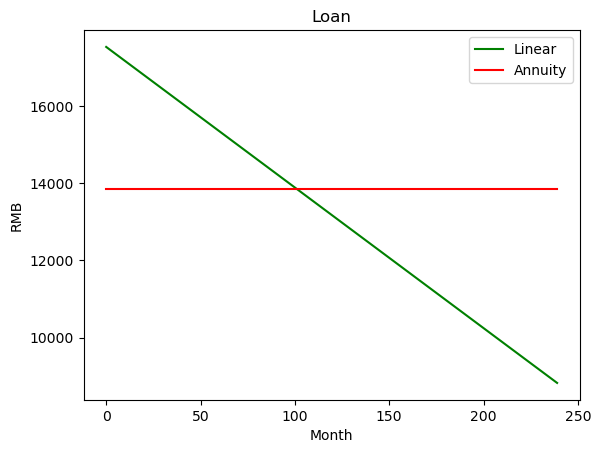

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = 3000000 * (1-0.3) # 贷款总额
n = 20                # 贷款年限
m = 12*n              # 贷款月数
R = 0.05              # 年利率
r = R/12              # 月利率

# 等额本金
a = A*(r + (1-(np.arange(m)-1)*r)/m)

# 等额本息
k = 1 + R/12
b = A * k**m * (1-k)/(1-k**m)

# 画图
t = np.arange(m)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, a, 'g-', label='Linear')
ax.plot(t, b * np.ones((m, 1)), 'r-', label='Annuity')
ax.set(title='Loan', xlabel='Month', ylabel='RMB')
ax.legend()

plt.show()

## 竞争模型

有三家航空公司`US Airways`、 `United Airlines`、`American Airlines`相互竞争：如果这次乘坐`US Airways`，则下次有75%的乘客仍然选择`US Airways`，有5%的乘客改选`United Airlines`，有20%的乘客该选`American Airlines`。试通过画图分析，在如下几种情形下，经过一段时间，三家航空公司的乘客数量如何变化？

![](images/flight.png)


|       | US Airways | United Airlines | American Airlines |
|-------|------------|-----------------|-------------------|
| 情形1 | 2222       | 778             | 1000              |
| 情形2 | 1000       | 10000           | 2000              |
| 情形3 | 0          | 0               | 4000              |